In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tarefa 2 - Conforme AVA

DataSet escolhido
https://www.kaggle.com/rikdifos/credit-card-approval-prediction


In [3]:
#data_df = pd.read_csv("application_record.csv")
low_memory=False
data_df = pd.read_csv(filepath_or_buffer='application_record.zip', compression='zip')

1. Verificar se o dataset tem problema de ruídos ou dados faltantes. Caso um dos problemas seja identificado, aplicar um método para tratar o problema.

In [4]:
# Verificando tamanho do dataset. (linhas, colunas)
data_df.shape

(438557, 18)

In [5]:
# Verificando dados faltantes
data_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
# Preenchendo informações nulas.
data_df.OCCUPATION_TYPE = data_df.OCCUPATION_TYPE.fillna("uninformed")
data_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [7]:
# Após inspeção visual foi verificado que as colunas OCCUPATION_TYPE E CNT_FAM_MEMBERS tinha dados faltantes
data_df['CNT_FAM_MEMBERS'].fillna(0, inplace=True)

In [8]:
data_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
# Analisando tipos de dados para ver se fazem sentido com o conteúdo.
data_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [10]:
data_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [11]:
# temos problemas com outliers, como é o caso do DAYS_EMPLOYED, pelo calculado algumas pessoas estão a 1000 anos sem emprego.
# Pela documentação
# DAYS_EMPLOYED = Faça a contagem regressiva a partir do dia atual (0). Se positivo, significa que a pessoa atualmente desempregada.
# Provavelmente deve ser para gerar outliers ao processo para garantir que as pessoas que nunca trabalharam não vão receber crédito. 
# Para fins didáticos vou extrair uma amostra sem estes casos.

# Pessoa empregada por 1000 anos. Considerando o "max" da coluna DAYS_EMPLOYED
365243 / 365.25

999.98083504449

<b>Parece que o valor 365243 é usado para indicar que a pessoa nunca trabalhou pois representa 999 anos</b> <br>

<b>Nota-se que o alto valor adotado na variável DAYS_EMPLOYED para indicar que a pessoa nunca trabalhou configura um outlier

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2269977320>,
      dtype=object)

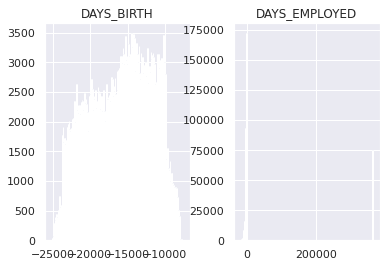

In [12]:
data_df[['DAYS_BIRTH','DAYS_EMPLOYED']].hist(bins=200)

<b> Também se nota que neste dataset, apesar de estar descrito que um número positivo no campo DAYS_EMPLOYED indicaria o número de dias desempregado, o único valor positivo existente é 999 anos

In [13]:
data_df[data_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].describe()

count     75329.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

<b> Por isso foi criado o df2 com o intuito de melhor visualizar os dados. 
    Foi criada uma variável categórica indicando se a pessoa nunca trabalhou e mais duas variáveis numéricas com o número de dias empregado e o número 
    

In [14]:
data_df[data_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].describe()

count     75329.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

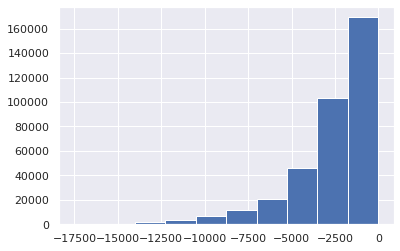

In [15]:
df2 = data_df[data_df['DAYS_EMPLOYED'] < 0]
df2['DAYS_EMPLOYED'].hist()

In [16]:
#Extraindo amostra, vou deixar os dados originais em outro dataframe.
#A feature DAYS_EMPLOYED foi removida para não gerar overfit
df_original = data_df
data_df = data_df.loc[ (data_df.DAYS_EMPLOYED < 365243) ]
data_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.632280e+05,363228.000000,3.632280e+05,363228.000000,363228.000000,363228.0,363228.000000,363228.000000,363228.000000,363228.000000
mean,6.022768e+06,0.507483,1.945939e+05,-14812.161711,-2623.052700,1.0,0.248882,0.286635,0.118815,2.290503
std,5.704994e+05,0.764181,1.141686e+05,3501.319668,2399.514253,0.0,0.432366,0.452190,0.323571,0.926890
min,5.008804e+06,0.000000,2.700000e+04,-24834.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.617530e+06,0.000000,1.350000e+05,-17455.000000,-3512.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047768e+06,0.000000,1.800000e+05,-14580.000000,-1924.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.448705e+06,1.000000,2.250000e+05,-11938.000000,-915.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,20.000000


2. Gerar um “sample” do dataset  que mantenha as características originais dos dados. Escolha um método e utilize a função resample do sklearn.utils.

In [17]:
from sklearn.utils import resample
data_df_res = data_df
resample(data_df,data_df_res, n_samples=5, replace=False)
data_df_res.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


3.Escolher um atributo categóricos e utilizar a função OneHotEncoder  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
para transformar em codificação inteira-binária os valores nominais .

In [18]:
# Analisando tipos de dados para ver se fazem sentido com o conteúdo.
data_df_res.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [19]:
# Inspeção visual do dataset
data_df_res.head()  

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [20]:
data_df_res['CODE_GENDER'].isnull().sum()

0

In [21]:
#Transformando dados categoricos em numericos (binarios)
  
new_df_dummie = pd.get_dummies(data_df_res)
new_df_dummie.head()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Conversão manual de atributos categóricos para numéricos

4.Aplicar pelo menos uma técnica de normalização no datase

In [22]:
columns_scaled = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"]
temp = pd.DataFrame(new_df_dummie, columns = columns_scaled)

standardScaler = preprocessing.StandardScaler()
data_scaled = standardScaler.fit_transform(temp)

In [23]:
print('Means (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS): ', data_scaled.mean(axis=0))
print('Standard Deviation (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS): ', data_scaled.std(axis=0))

Means (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS):  [-1.82708083e-17  1.43623420e-16 -3.18467622e-17 -1.25039622e-16]
Standard Deviation (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS):  [1. 1. 1. 1.]


In [24]:
#Criando dataframe a partir do data_scaled
np_array = np.array(data_scaled)
data_scaled = pd.DataFrame(data=np_array, columns=columns_scaled )
data_scaled.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,2.040023,0.801745,-0.799724,-0.313418
1,2.040023,0.801745,-0.799724,-0.313418
2,-0.719060,-1.902668,0.620565,-0.313418
3,0.660481,-1.227493,-0.178348,-1.392296
4,0.660481,-1.227493,-0.178348,-1.392296


In [25]:
#Unindo dataframe ao new_df_dummie

#Primeiro vamos remover as colunas originais
df_scaled = new_df_dummie
df_scaled = df_scaled.drop(columns_scaled, axis=1)
df_scaled = df_scaled.join(data_scaled)
df_scaled.head()

,ID,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418
1,5008805,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418
2,5008806,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.719060,-1.902668,0.620565,-0.313418
3,5008808,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296
4,5008809,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296


# Tarefa 3 - Conforme AVA

Realizando junçao dos datasets application_record e credit_record para ter a relação do ultimo pagamento da fatura do cartão de crédito.

In [26]:
data_df_credit_record = pd.read_csv(filepath_or_buffer='credit_record.csv')
data_df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [27]:
data_df_credit_record.shape

(1048575, 3)

In [28]:
#Buscando ultimo mes - 0 zero
data_df_credit_record_curren = data_df_credit_record.loc[data_df_credit_record['MONTHS_BALANCE'] == 0]
data_df_credit_record_curren.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
23,5001713,0,X
45,5001714,0,X
60,5001715,0,X


In [29]:
#Realizando junção dos dois dataframes
df_merge = pd.merge(df_scaled, data_df_credit_record_curren, on='ID')
df_merge.head()

,ID,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418,0,C
1,5008805,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418,0,C
2,5008806,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.719060,-1.902668,0.620565,-0.313418,0,C
3,5008808,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296,0,0
4,5008810,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296,0,C


In [30]:
df_merge.shape

(20539, 58)

In [31]:
df_merge.dtypes

ID                                                     int64
CNT_CHILDREN                                           int64
FLAG_MOBIL                                             int64
FLAG_WORK_PHONE                                        int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CODE_GENDER_F                                          uint8
CODE_GENDER_M                                          uint8
FLAG_OWN_CAR_N                                         uint8
FLAG_OWN_CAR_Y                                         uint8
FLAG_OWN_REALTY_N                                      uint8
FLAG_OWN_REALTY_Y                                      uint8
NAME_INCOME_TYPE_Commercial associate                  uint8
NAME_INCOME_TYPE_Pensioner                             uint8
NAME_INCOME_TYPE_State servant                         uint8
NAME_INCOME_TYPE_Student                               uint8
NAME_INCOME_TYPE_Working

In [32]:
#verificado valores NaN
df_scaled.isna().sum()

ID                                                       0
CNT_CHILDREN                                             0
FLAG_MOBIL                                               0
FLAG_WORK_PHONE                                          0
FLAG_PHONE                                               0
FLAG_EMAIL                                               0
CODE_GENDER_F                                            0
CODE_GENDER_M                                            0
FLAG_OWN_CAR_N                                           0
FLAG_OWN_CAR_Y                                           0
FLAG_OWN_REALTY_N                                        0
FLAG_OWN_REALTY_Y                                        0
NAME_INCOME_TYPE_Commercial associate                    0
NAME_INCOME_TYPE_Pensioner                               0
NAME_INCOME_TYPE_State servant                           0
NAME_INCOME_TYPE_Student                                 0
NAME_INCOME_TYPE_Working                                

In [33]:
#Preenchendo valores NaN com valor padrão (essa regra podera ser alterada)
#DAYS_BIRTH
#DAYS_EMPLOYED
#CNT_FAM_MEMBERS
#AMT_INCOME_TOTAL
 
df_scaled['DAYS_BIRTH'] = df_scaled['DAYS_BIRTH'].fillna(0)
df_scaled['DAYS_EMPLOYED'] = df_scaled['DAYS_EMPLOYED'].fillna(0)
df_scaled['CNT_FAM_MEMBERS'] = df_scaled['CNT_FAM_MEMBERS'].fillna(0)
df_scaled['AMT_INCOME_TOTAL'] = df_scaled['AMT_INCOME_TOTAL'].fillna(0)

df_scaled.isna().sum()

ID                                                   0
CNT_CHILDREN                                         0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCA

1) Executar o algoritmo k-means para um intervalo de 2 a 20 grupos.

In [34]:
#Removendo coluna ID
df_scaled = df_scaled.drop(['ID'], axis=1)
df_scaled.head()

,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418
1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.040023,0.801745,-0.799724,-0.313418
2,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.719060,-1.902668,0.620565,-0.313418
3,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296
4,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.660481,-1.227493,-0.178348,-1.392296


In [35]:
from sklearn.cluster import KMeans

In [36]:
#numero de clusters
n_clusters = 5
modelo = KMeans(n_clusters=n_clusters)
modelo.fit(df_scaled)
print(f'Grupos {modelo.labels_}')

Grupos [4 4 3 ... 0 0 0]


In [37]:
print(df_scaled.columns)
print(modelo.cluster_centers_)

Index(['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartm

In [38]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=df_scaled.columns)
grupos

,CNT_CHILDREN,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,0.483796,1.0,0.250055,0.288599,0.119568,1.000000,-8.208434e-13,0.723857,0.276143,0.298692,0.701308,0.274733,6.770815e-04,0.109800,7.052932e-06,0.614783,0.000875,0.301506,0.033537,0.004584,0.659499,0.097161,0.662806,0.075431,0.129767,0.034834,0.003012,0.894918,0.034122,0.009000,0.013358,0.045590,0.066961,0.024375,0.030984,0.147851,0.007116,0.003103,0.048164,0.000945,0.150792,0.001834,0.084536,0.057397,0.014014,0.003675,0.158465,0.007991,0.011574,0.006150,0.174073,-0.134362,-0.009377,0.253280,-0.395288
1,0.489807,1.0,0.250937,0.303325,0.121920,0.648433,3.515669e-01,0.600989,0.399011,0.331420,0.668580,0.273689,1.478852e-16,0.098078,5.315897e-05,0.628180,0.001010,0.295670,0.040932,0.006937,0.655450,0.091752,0.689897,0.067698,0.126040,0.024613,0.006087,0.890227,0.032613,0.008160,0.015762,0.047152,0.045159,0.014964,0.024001,0.119129,0.069505,0.001754,0.050155,0.001169,0.211094,0.005236,0.100098,0.035776,0.011615,0.003960,0.113016,0.006352,0.021078,0.004173,0.161763,-0.103513,-1.024092,-1.999997,-0.359758
2,0.491117,1.0,0.262457,0.299494,0.119428,0.726345,2.736554e-01,0.644872,0.355128,0.335154,0.664846,0.284366,-4.685922e-16,0.109520,1.577264e-04,0.605956,0.000846,0.305143,0.039475,0.007255,0.647281,0.096615,0.677148,0.067005,0.134526,0.024706,0.003456,0.889792,0.031689,0.008316,0.014769,0.051978,0.050472,0.018540,0.025007,0.128992,0.047175,0.002466,0.048766,0.001391,0.189602,0.005420,0.099999,0.041711,0.010725,0.003800,0.122396,0.006940,0.019931,0.005893,0.170775,-0.205225,0.599021,0.235503,1.360753
3,0.566018,1.0,0.237220,0.267368,0.115933,0.000011,9.999893e-01,0.344128,0.655872,0.337437,0.662563,0.276414,7.279968e-04,0.076579,3.211751e-05,0.646247,0.000460,0.252155,0.046549,0.010096,0.690741,0.065959,0.760725,0.035683,0.133598,0.004036,0.004561,0.869474,0.028660,0.013297,0.019999,0.064010,0.003319,0.002280,0.006124,0.066226,0.189493,0.000300,0.043755,0.003244,0.337148,0.012697,0.115741,0.002773,0.000867,0.000792,0.036742,0.000578,0.039879,0.001617,0.136424,-0.118239,0.032133,0.231438,-0.262315
4,0.492841,1.0,0.244002,0.286474,0.118953,0.673133,3.268673e-01,0.605166,0.394834,0.319321,0.680679,0.283282,-2.320193e-17,0.103377,1.345088e-17,0.613342,0.001064,0.298423,0.037490,0.004983,0.658040,0.094234,0.683001,0.057034,0.141060,0.024671,0.003918,0.893527,0.029073,0.010014,0.014658,0.048810,0.046536,0.015480,0.022446,0.115132,0.071401,0.003289,0.052486,0.001258,0.203318,0.005757,0.094330,0.041989,0.009820,0.001548,0.116583,0.006482,0.021478,0.003580,0.167086,2.331083,-0.228153

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2263020f60>,
      dtype=object)

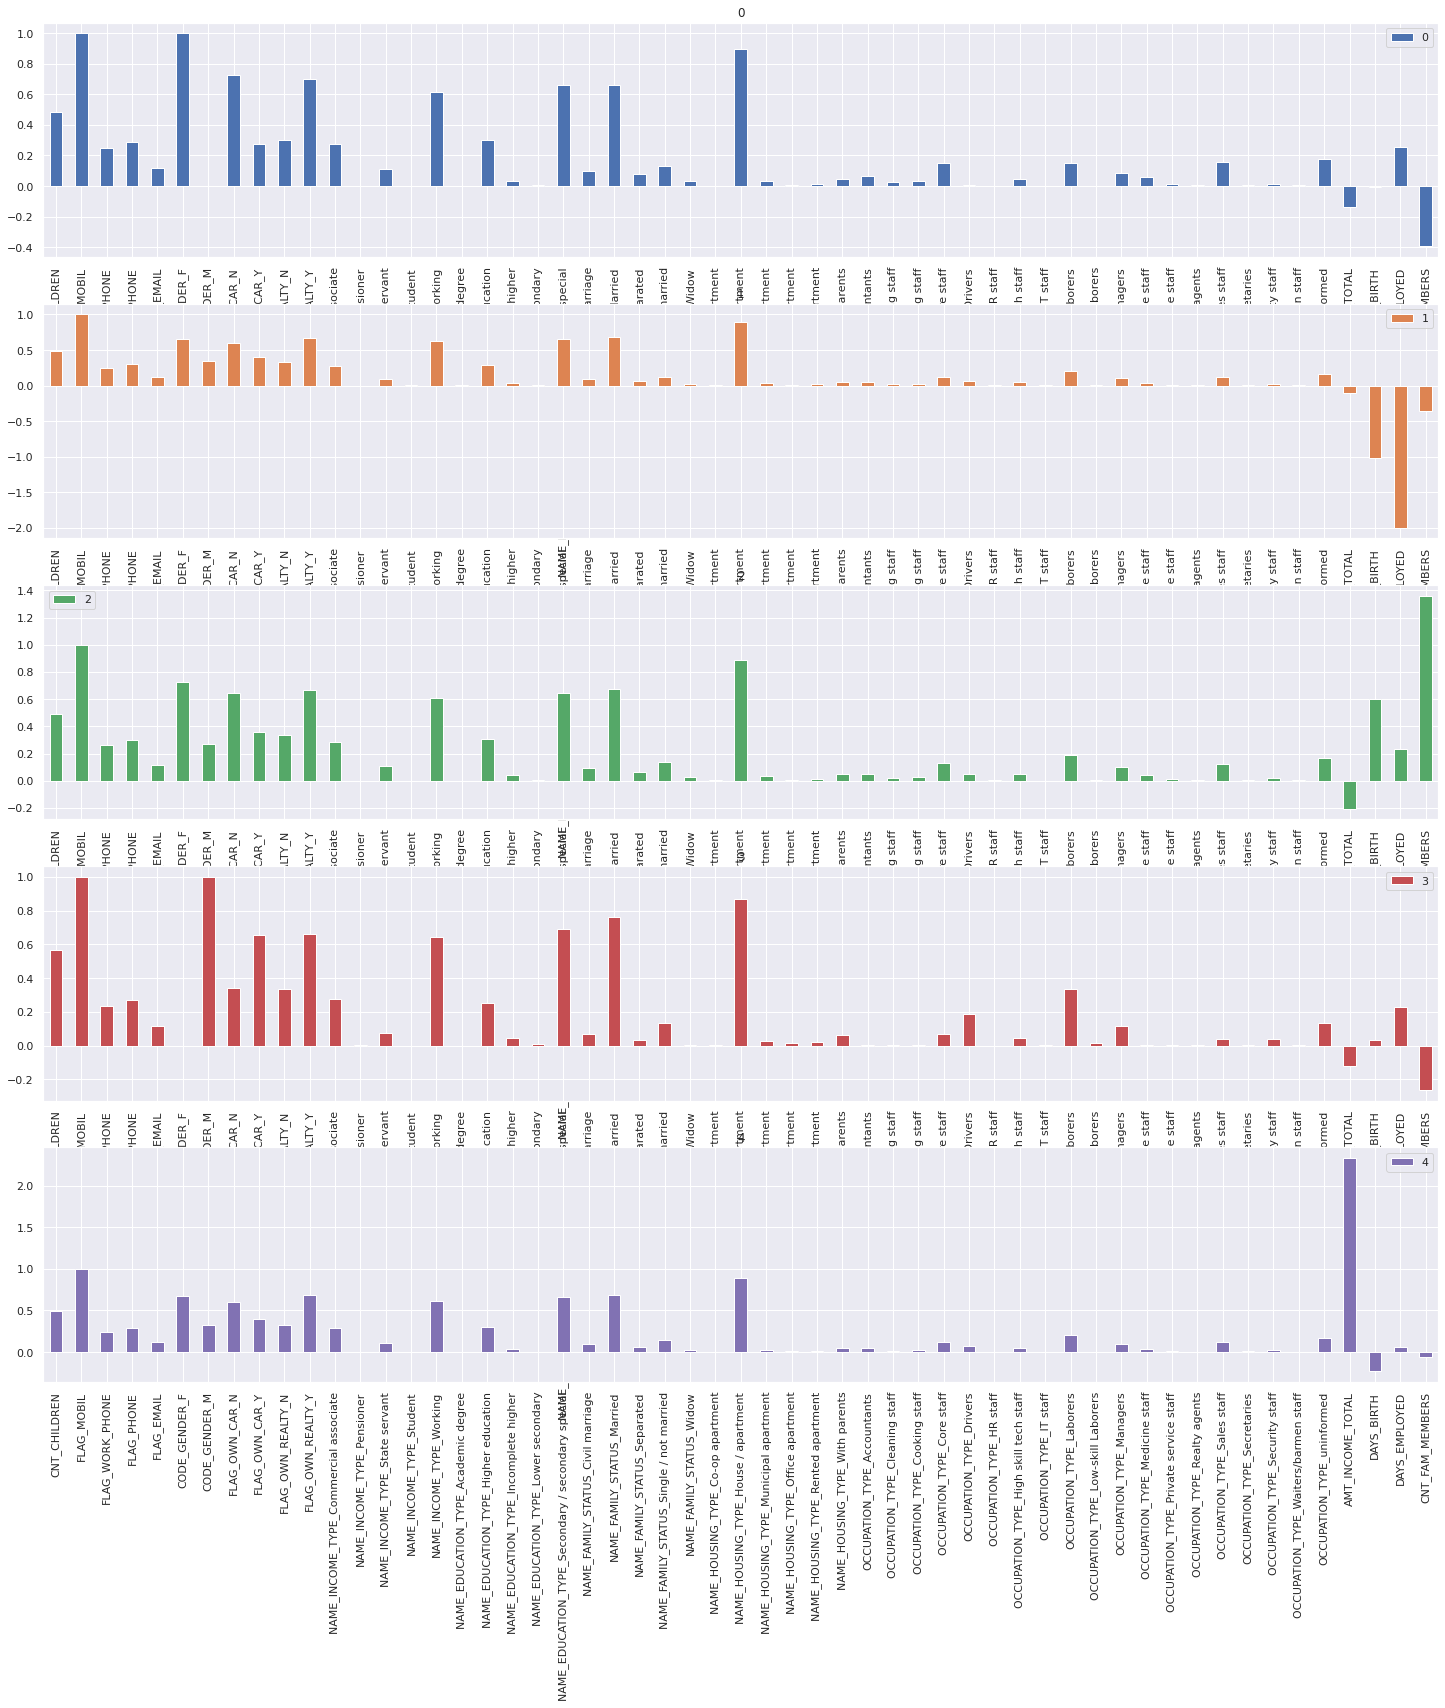

In [39]:
grupos.transpose().plot.bar(subplots=True,figsize=(25, 25),sharex=False)

2) Calcular o SSE para cada agrupamento.

In [40]:
[n_clusters, modelo.inertia_/100]

[5, 23824.18641931326]

In [41]:
def myKmeans(n_clusters, df):
  modelo = KMeans(n_clusters=n_clusters)
  modelo.fit(df)
  return [n_clusters, modelo.inertia_/100]

In [42]:
kMeansArray = []
kMeansRange = 12
for n_groups in range (1,kMeansRange):
    kMeansArray.append(myKmeans(n_groups, df_scaled))
kMeansArray

[[1, 30378.77411447822],
 [2, 27750.6316765976],
 [3, 26130.929016929917],
 [4, 24820.892665398445],
 [5, 23874.86656680931],
 [6, 22931.760473841314],
 [7, 22141.99211627555],
 [8, 21598.873112363228],
 [9, 21175.78644240714],
 [10, 20801.80968076957],
 [11, 20506.179521835576]]

3) Gerar um gráfico com os valores de SSE para encontrar o elbow.

In [43]:
kMeansDf = pd.DataFrame(kMeansArray, columns=['groups', 'inertia'], index=list(range(1, kMeansRange)))
kMeansDf.head()

,groups,inertia
1,1,30378.774114
2,2,27750.631677
3,3,26130.929017
4,4,24820.892665
5,5,23874.866567


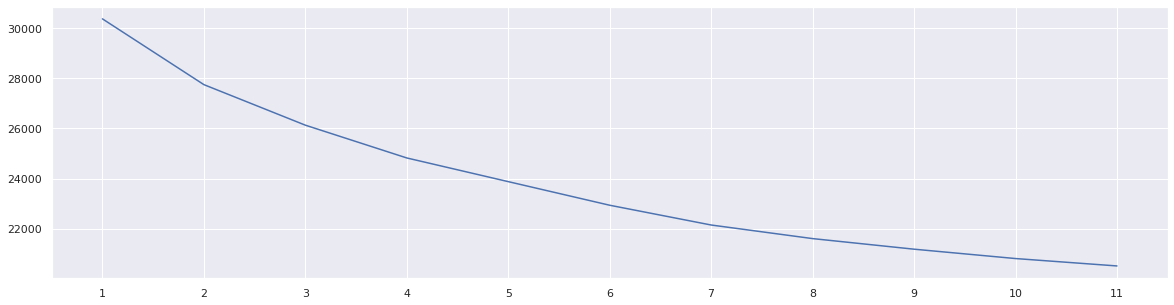

In [44]:
kMeansDf.inertia.plot(x=kMeansDf['groups'], y=kMeansDf['inertia'],figsize=(20, 5),xticks=kMeansDf['groups'])


Elbow com 20 clusters.

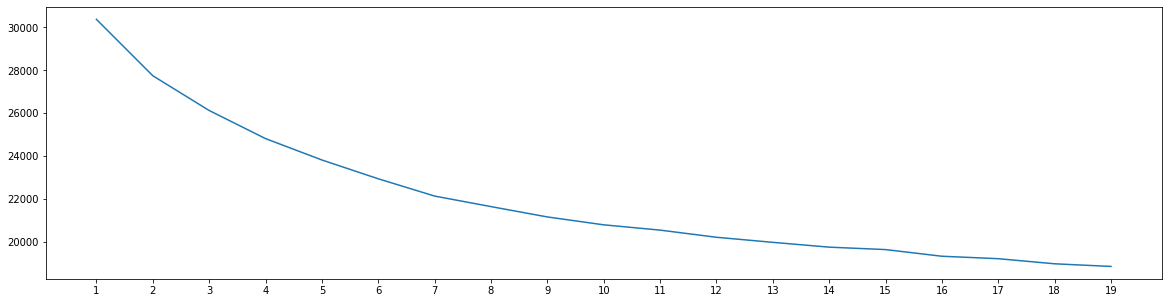

Elbow com 70 clusters

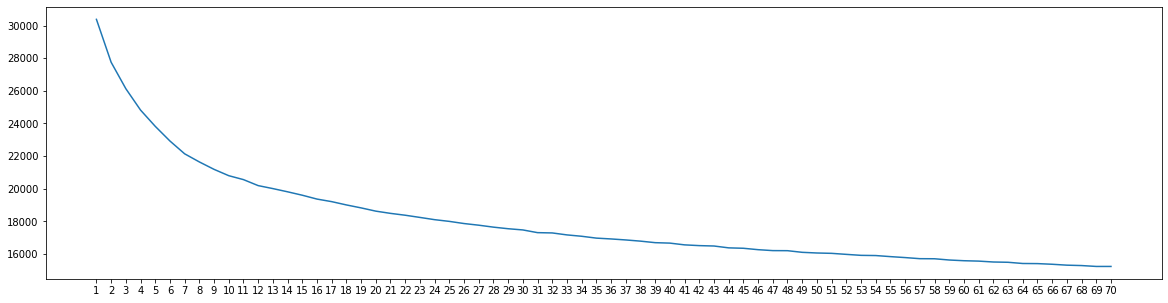

Pelas análises acima o numero de clusters fica por volta de 12.

4) Eleger o melhor agrupamento e realizar uma análise sobre a distribuição dos dados.

In [1]:
modelo = KMeans(n_clusters=kMeansRange)
modelo.fit(df_scaled)

NameError: name 'KMeans' is not defined

In [46]:
from sklearn.manifold import TSNE
import time

In [47]:
time_start = time.time()
tsne = TSNE()
view = tsne.fit_transform(df_scaled)
print ('Tempo para t-SNE: {} seconds',format(time.time()-time_start))
view

t-SNE done! Time elapsed: {} seconds 13173.598171710968


array([[ 29.594547 ,   1.9122003],
       [ 29.594496 ,   1.9122026],
       [ 16.83308  , -10.250328 ],
       ...,
       [ -7.8161454, -11.908201 ],
       [ 11.332176 ,   4.280211 ],
       [ 10.820081 , -37.227554 ]], dtype=float32)

In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=view[:, 0],
               y=view[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 12))

NameError: ignored